# 카이제곱분포와 표본분산의 분포

카이제곱분포는 다음과 같이 정의 된다. 

$Z_1, Z_2,... Z_n$ 이 서로 독립이고 N(0,1)인 표준정규 분포를 따를 때 그 제곱합의 분포인
$$ Y = \sum_{i=1}^n Z_i^2  \thicksim  \chi^2(n)$$
의 확률분포를 자유도가 N인 카이제곱분포라고 한다. 

자유도가 n인 카이제곱분포를 $\chi^2(n)$로 표기한다. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

표준정규분포에서 표본의 크기를 100만으로 하여 10개의 표본을 추출한다.  
이 표본의 제곱합을 계산한다.

In [3]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포로부터 10×100만 사이즈로 무작위추출
Zs_sample = rv.rvs((n, sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다
chi2_sample = np.sum(Zs_sample**2, axis=0)

10개의 표준정규분포의 제곱합이므로 자유도가 10인 카이제곱분포가 된다.  
따라서 아래 그래프에서 보듯이 10개 표준정규분포의 제곱합의 분포와 자유도10인 카이제곱분포는 일치한다. 

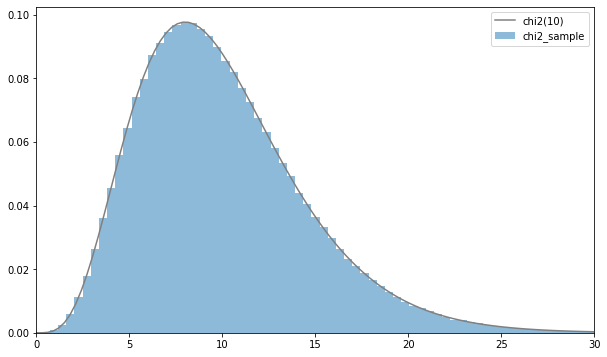

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)      # 자유도가 n인 카이제곱분포
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample') # 표준정규분포 제곱합의 분포
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

카이제곱 분포의 분포 개형은 자유도 n에 따라서 달라진다. 

**카이제곱분포의 특징**
* 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 꼬리가 길다.
* 자유도가 커지면 좌우대칭에 가까워 진다.
* 자유도 값 근처에 해당 분포의 정점이 있다.  

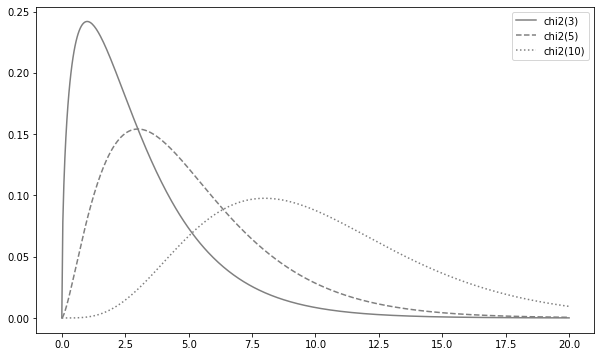

In [5]:
linestyles = ['-', '--', ':']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

isf 메소드를 사용하면 $\chi_\alpha^2(n)$ 을 계산할 수 있다. 

예를들어 $\chi_{0.05}^2(3)$ 는 다음과 같이 구한다.

In [6]:
rv = stats.chi2(3)
rv.isf(0.05)

7.815

#### 카이제곱 분포의 가법성

https://m.blog.naver.com/PostView.naver?blogId=lucifer246&logNo=189033879&proxyReferer=https:%2F%2Fwww.google.com%2F 

카이제곱 분포의 가법성이란?  
자유도가 df1인 카이제곱분포 V1과 자유도가 df2인 카이제곱분포 V2가 있을때 V1 + V2의 분포는 자유도 (df1 + df2)인 카이제곱분포를 따른다.
$$ V1 + V2 \thicksim \chi^2(df1 + df2)$$

In [7]:
sample_size = int(1e6)
rv1 = stats.chi2(3)
rv2 = stats.chi2(2)

v1 = rv1.rvs(sample_size)
v2 = rv2.rvs(sample_size)

sum_sample = v1 + v2


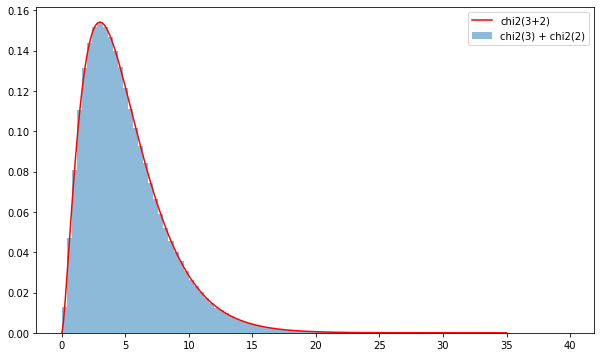

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sum_sample, bins=100, alpha=0.5, density=True, label = 'chi2(3) + chi2(2)')

xs = np.linspace(0, 35, 500)
rv = stats.chi2(5)
ax.plot(xs, rv.pdf(xs),
            label=f'chi2(3+2)', color='red')
ax.legend()
plt.show()

## 표본 분산의 분포

표본분산(Sample Variance)은 모집단에서 임의로 추출된 표본들의 분산을 나타낸다.   
추출된 집단에서의 표본 분산은 특정 분포를 따를 수 있다.


모집단이 모분산 $\sigma^2$인 정규분포일때 크기가 n인 표본을 랜덤 추출하면,
$$ \dfrac{(n-1)S^2}{\sigma^2} \thicksim  \chi^2(n-1)$$
이다.

여기서 $S^2$는 표본분산이다. $S^2 = \dfrac{1}{n-1}\sum_{i=1}^n(X_i - \bar{X})^2 $

이는 카이제곱분포의 가법성으로 설명된다. 

$Z =  \left(\dfrac{X_i-\mu}{\sigma}\right)^2 \thicksim N(0,1) $ 이고 카이제곱분포의 정의로 부터 
$$ \sum_{i=1}^n \left(\dfrac{X_i-\mu}{\sigma}\right)^2 \thicksim \chi^2(n)$$ 
이 성립한다.  

이 식은 다시 다음과 같이 분리 가능하다. 

$$\sum_{i=1}^n \left(\dfrac{X_i-\mu}{\sigma}\right)^2=\sum_{i=1}^n \left(\dfrac{X_i-\bar{X}}{\sigma}\right)^2 + n\left(\dfrac{\bar{X} - \mu}{\sigma}\right)^2 $$

표본분산은 다음과 같기 때문에 $$S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i - \bar{X})^2 $$

위 식에 대입해보면 다음과 같이 전개 된다. 

$$ \sum_{i=1}^n \left(\dfrac{X_i-\mu}{\sigma}\right)^2=\dfrac{(n-1)S^2}{\sigma^2} + \left(\dfrac{\bar{X} - \mu}{\dfrac{\sigma}{\sqrt{n}}}\right)^2$$

따라서 

$$ \sum_{i=1}^n \left(\dfrac{X_i-\mu}{\sigma}\right)^2 \thicksim \chi^2(n)$$ 이고 

$$\left(\dfrac{\bar{X} - \mu}{\dfrac{\sigma}{\sqrt{n}}}\right)^2 \thicksim \chi^2(1)$$
이므로 카이제곱의 가법성으로부터 

$$ \dfrac{(n-1)S^2}{\sigma^2} \thicksim  \chi^2(n-1)$$ 이 성립함을 보일수 있다. 

즉, 표본분산과 모분산의 비율에 (n-1)을 곱한 확률변수의 분포가 자유도 (n-1)인 카이제곱 분포이다. 

### 표본분산의 분포와 카이제곱 분포의 시뮬레이션

다음과 같은 정규분포를 따르는 모집단 N(100, 16^2) 크기가 8개인 샘플데이터를 10000개 생성한다.  
이 모집단에서 생성된 표본분산을 구하고 이 분포가 앞서 설명한 카이제곱분포의 이론분포와 동일한지 비교해 본다.


In [23]:

mean = 100
var = 256 
n = 8
sample_size = 10000

X = stats.norm(mean, np.sqrt(var)).rvs((n, sample_size))

X

array([[ 92.253,  82.231, 131.865, ..., 125.193, 129.96 , 108.872],
       [111.369,  93.021, 103.21 , ..., 105.08 ,  84.967,  89.54 ],
       [104.415, 122.212,  72.612, ...,  94.322, 121.857,  78.951],
       ...,
       [106.105,  98.659,  74.38 , ..., 106.132,  88.979, 116.202],
       [ 56.35 ,  96.3  , 124.047, ..., 104.186, 102.356, 118.373],
       [107.813, 117.413,  84.573, ..., 114.279,  87.93 , 107.708]])

In [24]:
S2 = np.var(X, ddof = 1, axis=0) # 표본분산

$ \dfrac{(n-1)S^2}{\sigma^2}$ 을 계산한다. 

In [25]:
FnofSsq = (8-1)*S2/var 

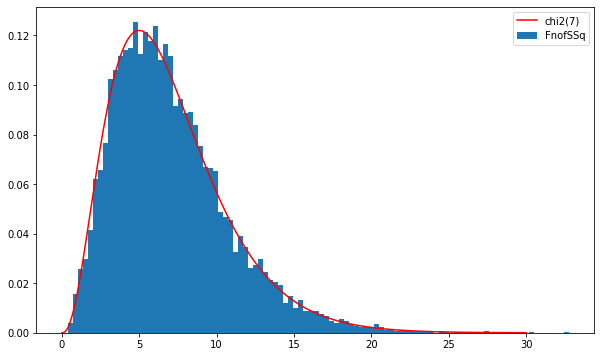

In [26]:
# 자유도가 7인 카이제곱분포와 비교해본다.

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(FnofSsq, bins=100, density=True, label = 'FnofSSq')

xs = np.linspace(0, 30, 500)
rv = stats.chi2(7)         # 자유도 7인 카이제곱분포
ax.plot(xs, rv.pdf(xs),
            label=f'chi2(7)', color='red')
ax.legend()
plt.show()